# Prediction using Supervised ML

##  Graduate Rotational Internship Program
## "The Sparks Foundation"

-------------------------------------------------------------------------------------------------------------------------------

### Task 2 - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
-------------------------------------------------------------------------------------------------------------------------------

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Check out the Data

In [2]:
iris_data = pd.read_csv("iris.csv")

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df = iris_data.drop(['Id','Species'], axis=1)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris = iris_df.iloc[:,[0,1,2,3]].values
iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Two methods that can be useful to find this mysterious k in k-Means.
#### These methods are:
#### The Elbow Method
Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids.
#### The Silhouette Method

The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

-------------------------------------------------------------------------------------------------------------------------------

## The Elbow Method

In [6]:
# function returns WSS score for k values from 1 to 10
from sklearn.cluster import KMeans
wss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris)
    wss.append(kmeans.inertia_)
print(wss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.56163015873016, 38.930963049671746, 34.19068792479662, 30.063874432733137, 27.84235606060606, 26.04820224804436]


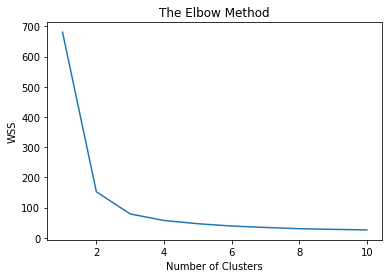

In [7]:
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS') 
plt.show()

## The Silhouette Method

In [8]:
from sklearn.metrics import silhouette_score

sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(iris)
    labels = kmeans.labels_
    sil.append(silhouette_score(iris, labels, metric = 'euclidean'))
print(sil)

[0.6808136202936816, 0.5525919445499757, 0.4978256901095472, 0.4885175508886279, 0.3682056968271308, 0.35087596063049353, 0.35840734296128407, 0.3348532058975179, 0.3094287224686447]


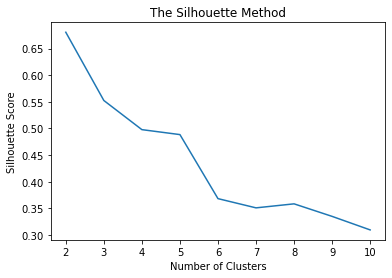

In [9]:
plt.plot(range(2, 11), sil)
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score') 
plt.show()

**From both the method we can see the clear elbow at 3 and Silhouette Max score at 2 and 3 
for now we can say 3 as perfect cluster but we'll plot with cluster value 2 3 and 4 to see visually**

## K Means Cluster Creation

### When Cluster is 4

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 2 0 2 2 2 2 3 2 2 2 0
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 0
 2 0]


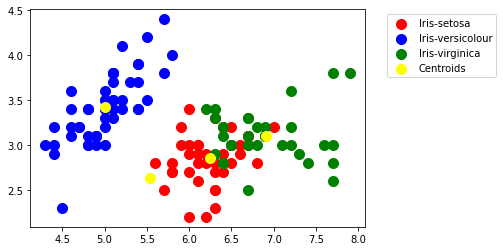

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

km = kmeans.fit_predict(iris) #Compute cluster centers and predict cluster index for each sample.
print(km)

# Visualising the clusters 
plt.scatter(iris[km == 0, 0], iris[km == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(iris[km == 1, 0], iris[km == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(iris[km == 2, 0], iris[km == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### When Cluster is 3

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


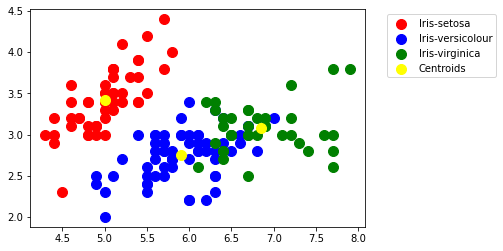

In [11]:
kmeans = KMeans(n_clusters=3)

km = kmeans.fit_predict(iris) 
print(km)

# Visualising the clusters 
plt.scatter(iris[km == 0, 0], iris[km == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(iris[km == 1, 0], iris[km == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(iris[km == 2, 0], iris[km == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### When Cluster is 2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


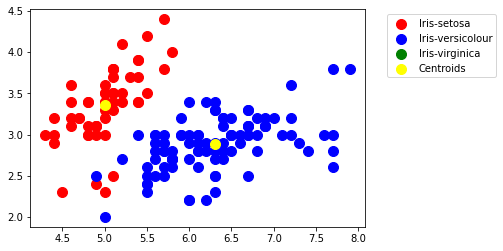

In [12]:
kmeans = KMeans(n_clusters=2)

km = kmeans.fit_predict(iris) 
print(km)


plt.scatter(iris[km == 0, 0], iris[km == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(iris[km == 1, 0], iris[km == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(iris[km == 2, 0], iris[km == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In above all pictures , we can clearly see that how plot and score are different according to k.

K-means clustering is a simplest and popular unsupervised machine learning algorithms. 

We can evaluate the algorithm by two ways such as elbow technique and silhouette technique . 

We saw differences between them above . We can also use elbow technique for quick response and intuition. 

The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.

Therefore, the Elbow Method and the Silhouette Method are not alternatives to each other for finding the optimal K. Rather they are tools to be used together for a more confident decision.